<a href="https://colab.research.google.com/github/SimplyJuanjo/Game-of-Life/blob/main/Animation2ndTryGameOfLifeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#ThirdProject: Let's sum up all I have learned this 2 weeks into a classy project: Game Of Life 

#Input information from Wiki:
#The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead, 
# (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally 
# adjacent. At each step in time, the following transitions occur:

  # - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
  # - Any live cell with two or three live neighbours lives on to the next generation.
  # - Any live cell with more than three live neighbours dies, as if by overpopulation.
  # - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

#To sum:

  # - Any live cell with two or three live neighbours survives.
  # - Any dead cell with three live neighbours becomes a live cell.
  # - All other live cells die in the next generation. Similarly, all other dead cells stay dead.

In [40]:
#Intuition: I suppose I'll be needing a matrix of 0s and 1s to perfom the logic, and then some other module to transform the arrays into square cells dead(0) or alive (1)
#First I'll try module numpy for matrix manipulation
#Then I'll search the other module for visualization : matplotlib

#Func I'll need:
    # - Checking nearby cells (implemented)
    # - Updating next gen (implemented)
    # - Show actual gen (implemented)
    # - Func for 1 life cycle (implemented)
    # - Func for nth iterations (implemented)


In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Playing with np and random
rng = np.random.default_rng()
testM = np.zeros((16,16))

print(testM) #Bien, tenemos un marco jeje, ahora toca averiguar como pasarlo a gráficos

testMR = np.zeros((16,16))
testMR = rng.integers(2, size = (16,16))

print(testMR)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1]
 [0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0]
 [1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0]
 [0 1 0 

In [42]:
#Func for check the surrounding cells and output their total value
def checkCells(A):
  n, m = A.shape
  B = np.zeros((n,m))
  for i in range(n):
    for j in range(m):
      tempSum = 0
      try:
        if A[i-1,j-1] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i,j-1] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i+1,j-1] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i-1,j] == 1:
          tempSum += 1
      except:
        pass
#      try:
#       if A[i,j] == 1:           Old error, do not count the self cell
#         tempSum += 1
#     except:
#       pass
      try:
        if A[i+1,j] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i-1,j+1] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i,j+1] == 1:
          tempSum += 1
      except:
        pass
      try:
        if A[i+1,j+1] == 1:
          tempSum += 1
      except:
        pass
      B[i,j] = tempSum
  return B

In [43]:
#Func for updating next generation of A based on B value:
def nextGen(A,B):
  n, m = A.shape
  for i in range(n):
    for j in range(m):
      if A[i,j] == 1 and (B[i,j] == 2 or B[i,j] == 3):
        A[i,j] = 1
      elif A[i,j] == 0 and B[i,j] == 3:
        A[i,j] = 1
      else:
        A[i,j] = 0
  
  return A

In [44]:
#Func for showing the actual generation of cells in A
def showGen(A):
  #plt.figure(figsize=(3,3))
  plt.imshow(A)#, aspect="auto")
  plt.axis("off")
  plt.pause(0.001)
  #Ahora apenas usaremos esto más que una vez al init

In [45]:
#Func for basic lifeCycle:
def lifeCycle(A):
  B = checkCells(A)
  A = nextGen(A,B) 
  #showGen(A)           #Vamos a crear animation so prescindimos de esto por un rato lo usaremos para testing solo
  
  return A

In [54]:
#Func for nth iterations:
def iterCycle(nIter,A):
  AList = [A]
  #type(AList)

  for iter in range(nIter):
    
    Achange = lifeCycle(A)
    AList.append(Achange)
    print(f'Showing {iter}th AList')
    showGen(AList[iter])         #Tambien funciona el test AQUÍ PQ
    A = Achange

  return AList

In [47]:
#Define 1st matrix:
def init():
  A = np.zeros((50,50))
  #Insert init value for 1st gen blueprint
  A[7,4] = 1
  A[8,4] = 1
  A[7,5] = 1
  A[8,5] = 1

  A[5,38] = 1
  A[6,38] = 1
  A[5,39] = 1
  A[6,39] = 1

  A[3,28] = 1
  A[4,28] = 1
  A[8,28] = 1
  A[9,28] = 1
  A[4,26] = 1
  A[8,26] = 1

  A[5,25] = 1
  A[6,25] = 1
  A[7,25] = 1
  A[5,24] = 1
  A[6,24] = 1
  A[7,24] = 1

  A[8,21] = 1
  A[7,20] = 1
  A[8,20] = 1
  A[9,20] = 1
  A[6,19] = 1
  A[10,19] = 1
  A[8,18] = 1

  A[5,17] = 1
  A[5,16] = 1
  A[11,16] = 1
  A[11,17] = 1

  A[6,15] = 1
  A[7,14] = 1
  A[8,14] = 1
  A[9,14] = 1
  A[10,15] = 1

  A[15,3] = 1
  A[16,4] = 1
  A[17,4] = 1
  A[17,3] = 1
  A[17,2] = 1

  A[40,10] = 1
  A[40,11] = 1
  A[40,12] = 1

  #showGen(A)

  return A

Showing 0th AList


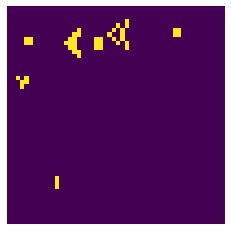

Showing 1th AList


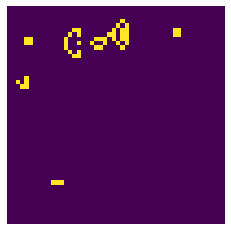

Showing 2th AList


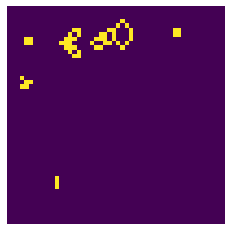

Showing 3th AList


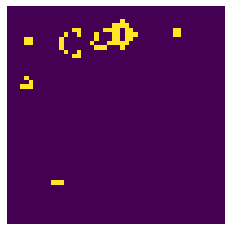

Showing 4th AList


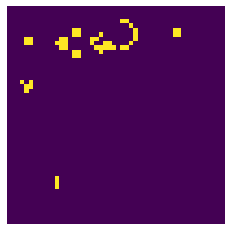

Showing 5th AList


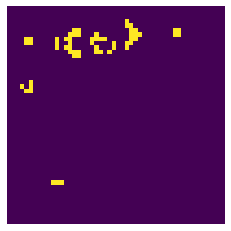

Showing 6th AList


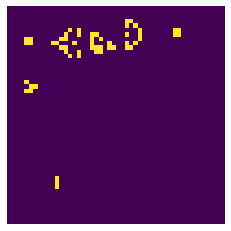

Showing 7th AList


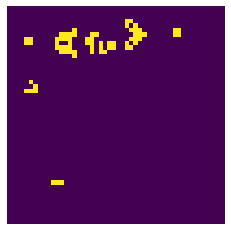

Showing 8th AList


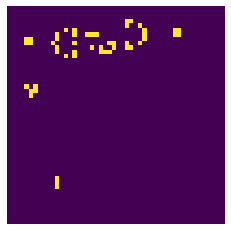

Showing 9th AList


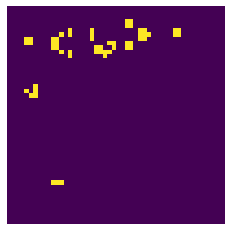

Showing 10th AList


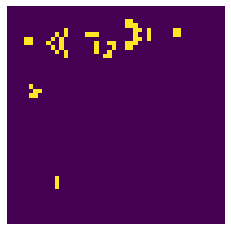

Showing 11th AList


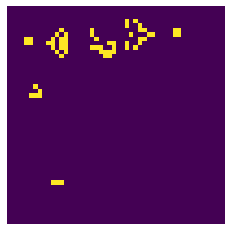

Showing 12th AList


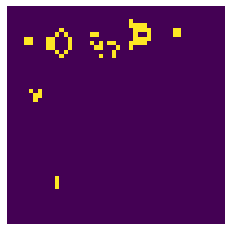

Showing 13th AList


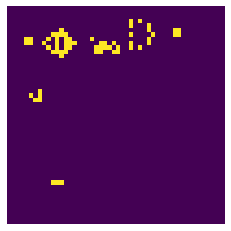

Showing 14th AList


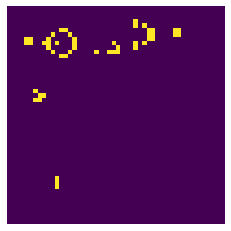

Showing 15th AList


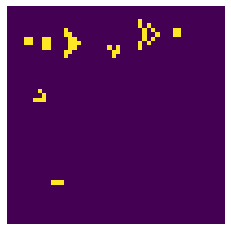

Showing 16th AList


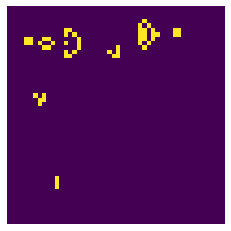

Showing 17th AList


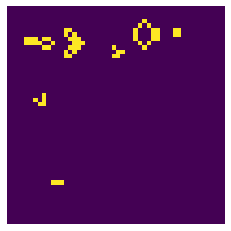

Showing 18th AList


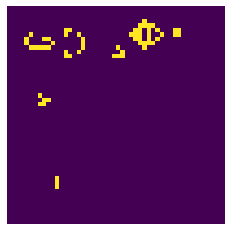

Showing 19th AList


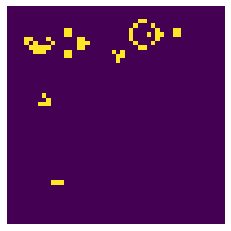

Showing 20th AList


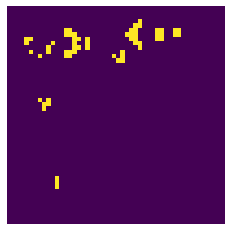

Showing 21th AList


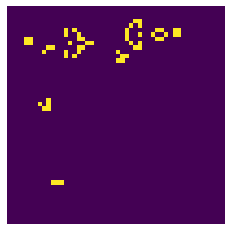

Showing 22th AList


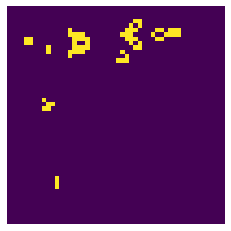

Showing 23th AList


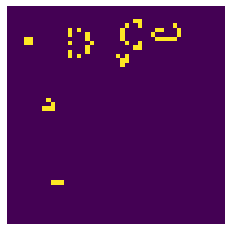

Showing 24th AList


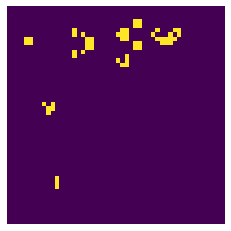

Showing 25th AList


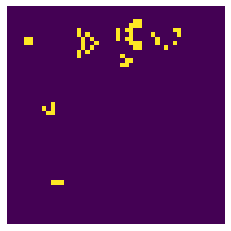

Showing 26th AList


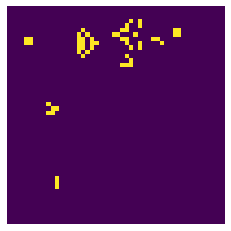

Showing 27th AList


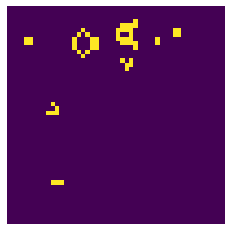

Showing 28th AList


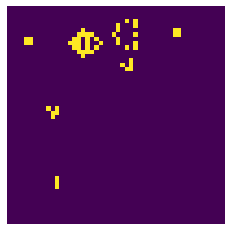

Showing 29th AList


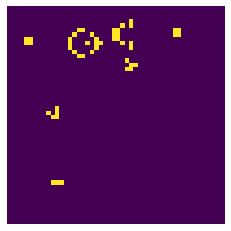

Showing 30th AList


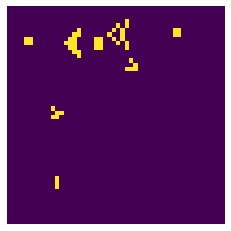

Showing 31th AList


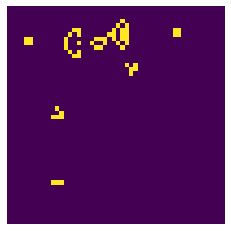

Showing 32th AList


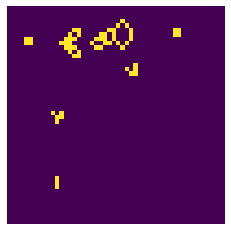

Showing 33th AList


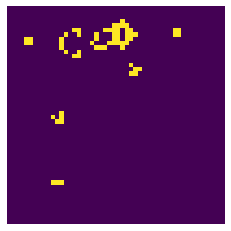

Showing 34th AList


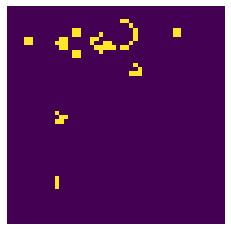

Showing 35th AList


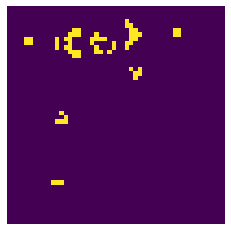

Showing 36th AList


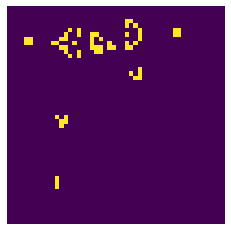

Showing 37th AList


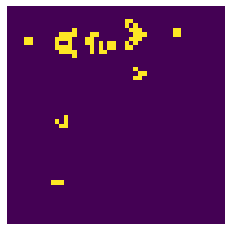

Showing 38th AList


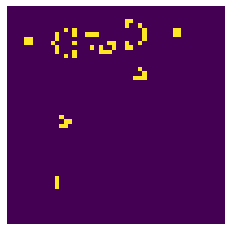

Showing 39th AList


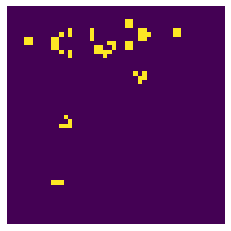

Showing 40th AList


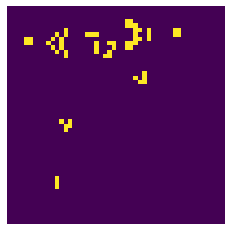

Showing 41th AList


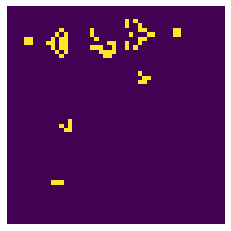

Showing 42th AList


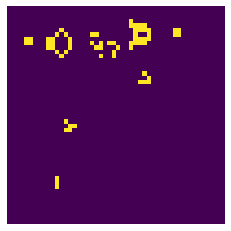

Showing 43th AList


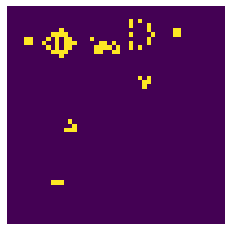

Showing 44th AList


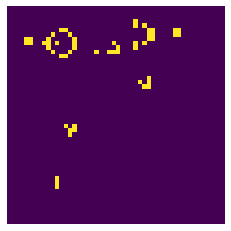

Showing 45th AList


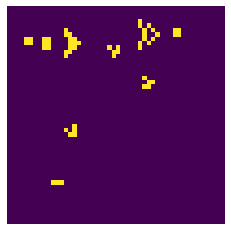

Showing 46th AList


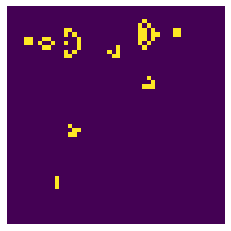

Showing 47th AList


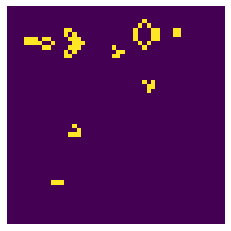

Showing 48th AList


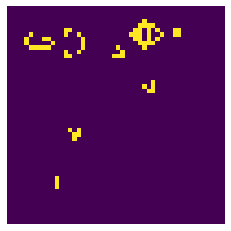

Showing 49th AList


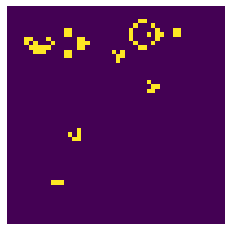

Showing 50th AList


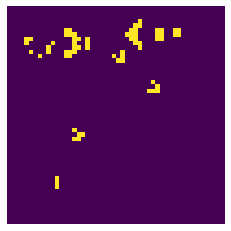

Showing 51th AList


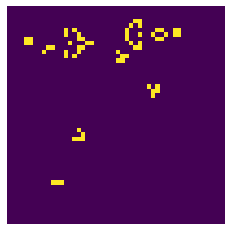

Showing 52th AList


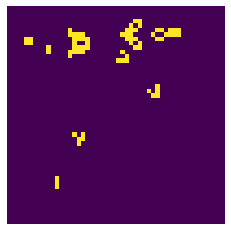

Showing 53th AList


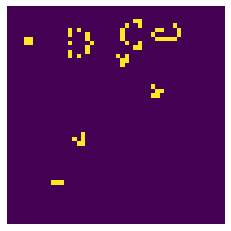

Showing 54th AList


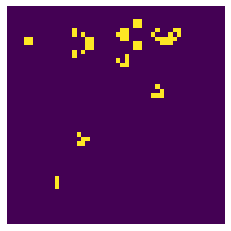

Showing 55th AList


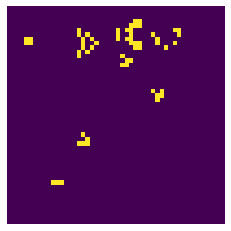

Showing 56th AList


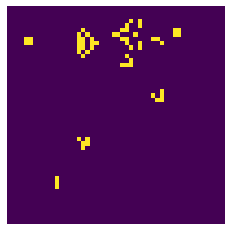

Showing 57th AList


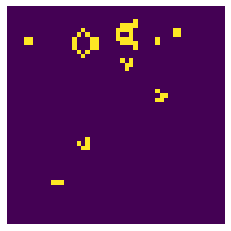

Showing 58th AList


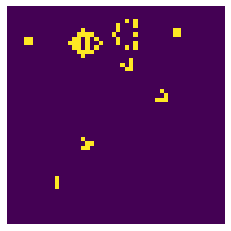

Showing 59th AList


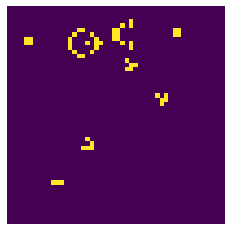

Showing 60th AList


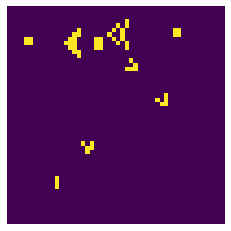

Showing 61th AList


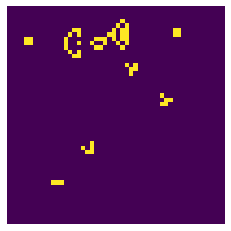

Showing 62th AList


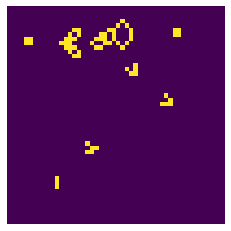

Showing 63th AList


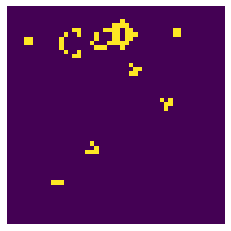

Showing 64th AList


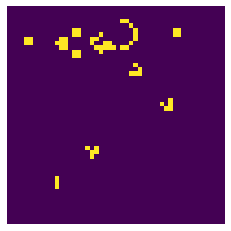

Showing 65th AList


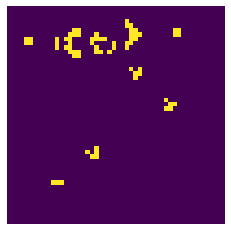

Showing 66th AList


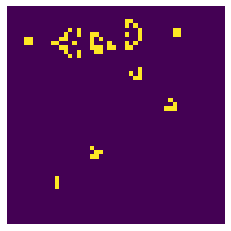

Showing 67th AList


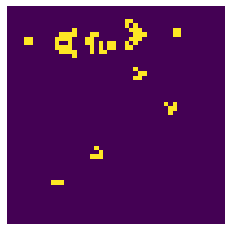

Showing 68th AList


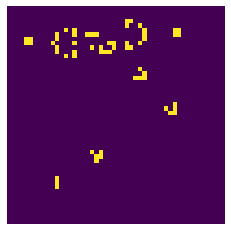

Showing 69th AList


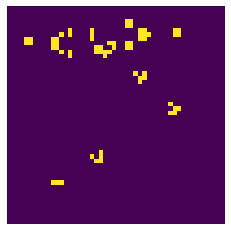

Showing 70th AList


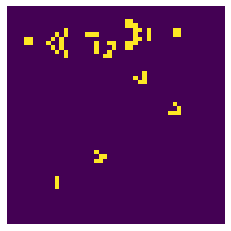

Showing 71th AList


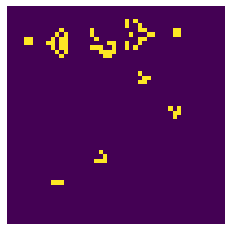

Showing 72th AList


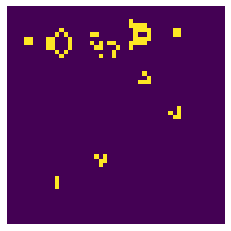

Showing 73th AList


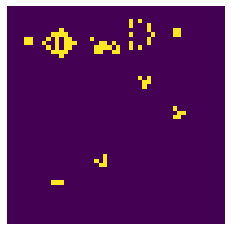

Showing 74th AList


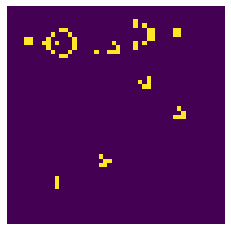

Showing 75th AList


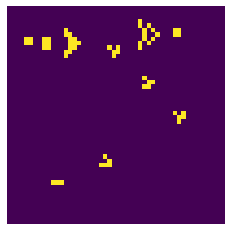

Showing 76th AList


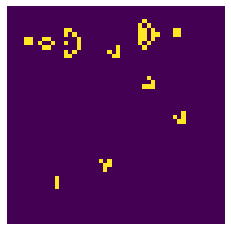

Showing 77th AList


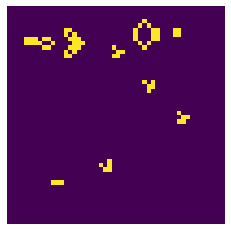

Showing 78th AList


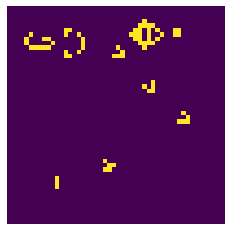

Showing 79th AList


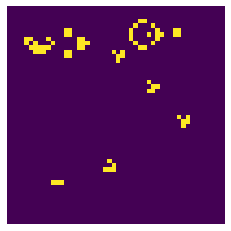

Showing 80th AList


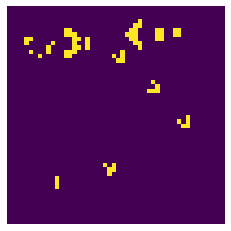

Showing 81th AList


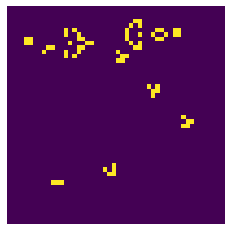

Showing 82th AList


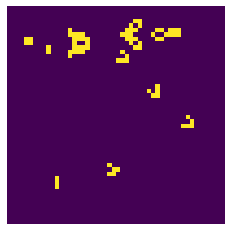

Showing 83th AList


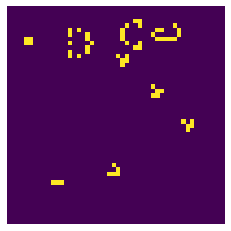

Showing 84th AList


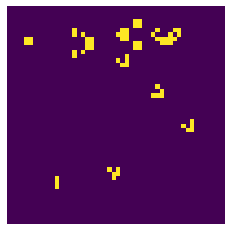

Showing 85th AList


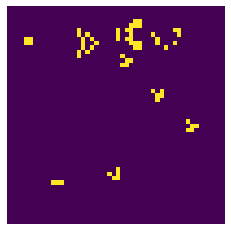

Showing 86th AList


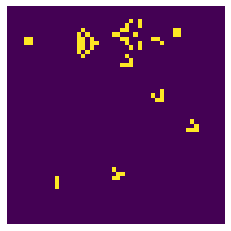

Showing 87th AList


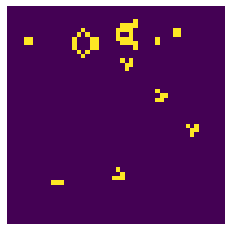

Showing 88th AList


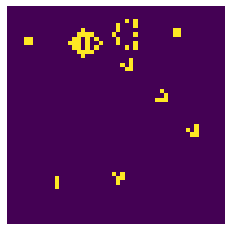

Showing 89th AList


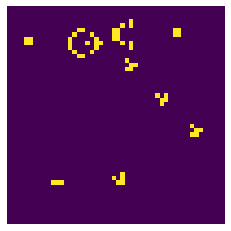

Showing 90th AList


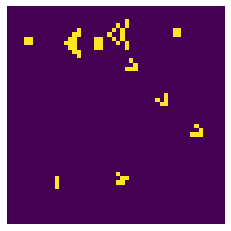

Showing 91th AList


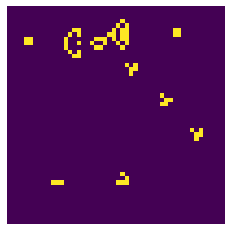

Showing 92th AList


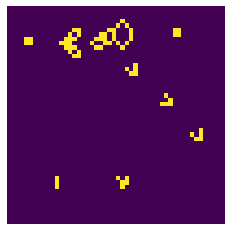

Showing 93th AList


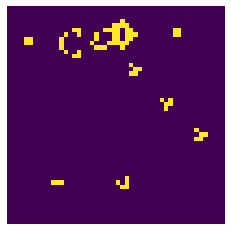

Showing 94th AList


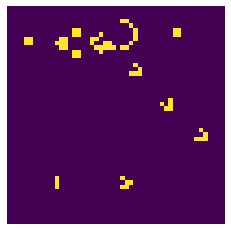

Showing 95th AList


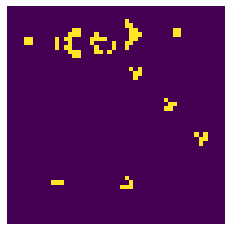

Showing 96th AList


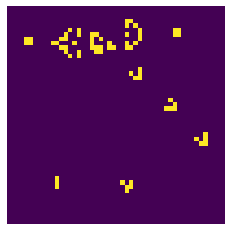

Showing 97th AList


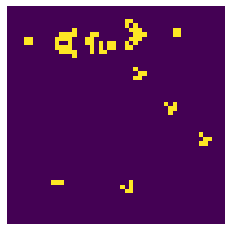

Showing 98th AList


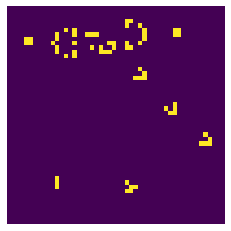

Showing 99th AList


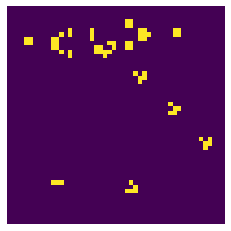

In [55]:
#Animation:
from matplotlib import animation, rc
rc('animation', html='jshtml')

def update(i):
    ax.clear()
    ax.imshow(AList[i], cmap='gray')
    ax.axis('off')
    return ax

A = init()
#Set iteration cycles and run
nIter = 100
AList = iterCycle(nIter, A)

#fig = plt.figure(figsize=(5,5))
#ax = plt.subplot(1,1,1)
#anim = animation.FuncAnimation(fig, update, frames=len(AList), interval = 100)
#plt.close()

#anim

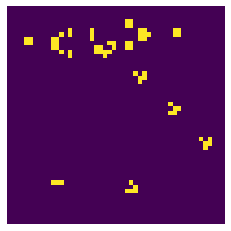

In [56]:
showGen(AList[77])